# ***Decision Trees and MONK datasets***

## Imports

In [1]:
import monkdata as m
import dtree as dt
import drawtree as dt_plus
import random
import matplotlib.pyplot as plt
import numpy as np

## Entropy

Entropy of the training datasets:

In [5]:
e1 = dt.entropy(m.monk1)
e2 = dt.entropy(m.monk2)
e3 = dt.entropy(m.monk3)

print("| MONK-1: | {} |.".format(e1))
print("| MONK-2: | {} |.".format(round(e2, 5)))
print("| MONK-3: | {} |.".format(round(e3, 5)))

| MONK-1: | 1.0 |.
| MONK-2: | 0.95712 |.
| MONK-3: | 0.99981 |.


Entropy evaluates the uncertainty or unpredictability of a probability distribution.

For uniform distributions, entropy is maximized because there is a great uncertainty regarding which outcome will occur. In general, if each outcome has a probability $P = 1/n$ to occur, we will have $Entropy(S) = log_2(n)$.
Example: If we have a fair coin, both heads and faces have a probability of 0.5 to occur, it is a uniform distribution. Then $Entropy(S) = −0.5 log_2(0.5) − 0.5 log_2(0.5) = log_2(2) = 1$. 


For non-uniform distributions, entropy is lower because there is less uncertainty: some outcomes are more likely than others, making the distribution more predictable.
Example: if we have a biased coin where the probability of heads is 0.9 and the probability of tails is 0.1. Then $Entropy(S) = -0.9 log_2(0.9) - 0.1 log_2(0.1) = 0.469$.

## Information Gain

The information gain measures the expected reduction in impurity caused by
partitioning the examples according to an attribute. It thereby indicates the
effectiveness of an attribute in classifying the training data.

Expected information gain corresponding to each of the six attributes:

In [7]:
gain = []
models = [m.monk1, m.monk2, m.monk3]
for i in range(len(models)):
    gain.append([round(dt.averageGain(models[i], m.attributes[k]), 4) for k in range(len(m.attributes))])

# Detailed values
for i in range(len(models)): 
    print("| MONK-{} | {} |".format(i+1, gain[i]))
    
# Means
for i in range(len(m.attributes)): 
    mean = round((gain[0][i]+gain[1][i]+gain[2][i])/3, 4)
    print("a{} mean: {}".format(i+1, mean))

| MONK-1 | [0.0753, 0.0058, 0.0047, 0.0263, 0.287, 0.0008] |
| MONK-2 | [0.0038, 0.0025, 0.0011, 0.0157, 0.0173, 0.0062] |
| MONK-3 | [0.0071, 0.2937, 0.0008, 0.0029, 0.2559, 0.0071] |
a1 mean: 0.0287
a2 mean: 0.1007
a3 mean: 0.0022
a4 mean: 0.015
a5 mean: 0.1867
a6 mean: 0.0047


$a_5$ is the attribute that offers the best general information gain, so it should be used for splitting the examples at  the root node.

$S_k$ represent the $k$ subsets created after splitting the dataset based on attribute 𝐴. Their entropy will range between 0 and the total entropy. The closer it is from 0, the higher the information gain is (ideally, after the split, each subset contains only one class and entropies are null).

## Building Decision Trees

In [9]:
# Choosing attribute
attribute = m.attributes[4] # splitting according to a5

# Splitting according to a5
subsets_1 = []
for k in attribute.values:
    subsets_1.append(dt.select(m.monk1, attribute, k))

# Evaluating attributes for the next nodes
gain = []
idx_max = []
for i in range(len(subsets_1)):
    gain.append([round(dt.averageGain(subsets_1[i], m.attributes[k]), 4) for k in range(len(m.attributes))])
    maxi = max(gain[i])
    if maxi == 0:
        idx_max.append(None) # if we are done with this subset
    else:
        idx_max.append(gain[i].index(maxi)+1) # storing max index
    
# Detailed values
for i in range(len(subsets_1)): 
    print("| Subset {} | {} |".format(i+1, gain[i]))

# Results
for i in range(len(subsets_1)): 
    print("Subset {}: attribute {}".format(i+1, idx_max[i]))

| Subset 1 | [0.0, 0.0, 0.0, 0.0, 0.0, 0.0] |
| Subset 2 | [0.0402, 0.0151, 0.0373, 0.0489, 0.0, 0.0258] |
| Subset 3 | [0.0331, 0.0022, 0.018, 0.0191, 0.0, 0.0451] |
| Subset 4 | [0.2063, 0.0339, 0.0259, 0.0759, 0.0, 0.0033] |
Subset 1: attribute None
Subset 2: attribute 4
Subset 3: attribute 6
Subset 4: attribute 1


Gain from $a_5$ is of course null now. Subset 1 only contains one class, we cannot gain any more information.

In [37]:
# Same for next nodes
subsets_2 = []
maj_c = []

for i in range(len(subsets_1)):
    if idx_max[i] == None: # we are done with this subset
        s1 = subsets_1[i]
        maj_c.append([m.attributes[4], 1, dt.mostCommon(s1)])
    else:
        attribute = m.attributes[idx_max[i]-1] # selecting the best attribute for this subset
        for k in attribute.values: # splitting according to a1
            s2 = dt.select(subsets_1[i], attribute, k)
            subsets_2.append(s2)
            maj_c.append([attribute, 2, dt.mostCommon(s2)]) # getting the majority class of each subset

Comparaison

In [40]:
print(maj_c)

[[A5, 1, True], [A4, 2, False], [A4, 2, False], [A4, 2, False], [A6, 2, False], [A6, 2, False], [A1, 2, False], [A1, 2, False], [A1, 2, True]]


In [46]:
tree = dt.buildTree(m.monk1, m.attributes, 2) # building real tree
dt_plus.drawTree(tree) # printing real tree

SystemExit: 0

C:\Users\cleme\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Build the full decision trees for all three Monk datasets and evaluate performance

In [53]:
errors = []
models = [m.monk1, m.monk2, m.monk3]
test_sets = [m.monk1test, m.monk2test, m.monk3test]
for i in range(len(models)):
    t = dt.buildTree(models[i], m.attributes)
    errors.append([round(dt.check(t, models[i]), 4), round(dt.check(t, test_sets[i]), 4)])
    
# Printing values
for i in range(len(models)): 
    print("| MONK-{} | Train Acc: {} | Test Acc: {}".format(i+1, errors[i][0], errors[i][1]))

| MONK-1 | Train Acc: 1.0 | Test Acc: 0.8287
| MONK-2 | Train Acc: 1.0 | Test Acc: 0.6921
| MONK-3 | Train Acc: 1.0 | Test Acc: 0.9444


## Pruning

In [11]:
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

# Splitting training set
monk1train, monk1val = partition(m.monk1, 0.6)
monk2train, monk2val = partition(m.monk2, 0.6)
monk3train, monk3val = partition(m.monk3, 0.6)

In [13]:
train_models = [monk1train, monk2train, monk3train]
test_sets = [m.monk1test, m.monk2test, m.monk3test]
val_models = [monk1val, monk2val, monk3val]
best_trees = [0]*len(train_models)
errors = []

for i in range(len(train_models)):
    t = dt.buildTree(train_models[i], m.attributes)
    pruned = dt.allPruned(t)
    best_err = 0
    for p in pruned:
        err = dt.check(p, val_models[i])
        if err > best_err:
            best_err = err
            best_trees[i] = p
    errors.append([round(dt.check(best_trees[i], train_models[i]), 4), round(dt.check(best_trees[i], test_sets[i]), 4)])

The goal of pruning is to find the right balance between bias and variance to minimize the overall error on unseen data.
A decision tree that is not pruned will often be very deep and complex, as it attempts to perfectly fit the training data. This leads to:
- Low bias: The tree captures most of the patterns in the training data, so the predictions are highly accurate on the training set.
- High variance: Since the tree is very specific to the training data, it may capture noise, leading to overfitting and poor generalization on test data.

Pruning involves removing branches from the decision tree that do not contribute significantly to improving the predictive power. This is done by either pre-pruning (limiting the depth) or post-pruning (removing branches after the tree is fully grown).
Pruning impacts the bias-variance trade-off as follows:
- Increasing bias: By cutting back the tree and simplifying it, some of the intricate patterns (or even noise) that the deep tree captured may be lost. This introduces some bias, as the tree is now less flexible and might not fit the training data as well.
- Reducing variance: A pruned tree generalizes better to unseen data because it no longer captures noise or overfits to the idiosyncrasies of the training set. This reduces the variance, meaning the model's predictions will be more stable and consistent across different datasets.

Pruning essentially adds some bias to reduce variance, aiming for a middle ground where the model is not too simple (high bias) or too complex (high variance).
- Before pruning: The tree might have very low training error but high test error because it's too specific to the training data (high variance, low bias).
- After pruning: The tree sacrifices some accuracy on the training data by being simpler (slightly higher bias), but it achieves better performance on unseen data (lower variance).

In [16]:
# Printing values
for i in range(len(train_models)): 
    print("| MONK-{} | Train Acc: {} | Test Acc: {}".format(i+1, errors[i][0], errors[i][1]))

| MONK-1 | Train Acc: 0.9865 | Test Acc: 0.8889
| MONK-2 | Train Acc: 0.6139 | Test Acc: 0.6713
| MONK-3 | Train Acc: 0.9863 | Test Acc: 0.9537


### Optimizing the fraction parameter

The fraction parameter represents the part of the original dataset used to train the full tree.
The remaining 1 - fraction is used as a validation set to select the best pruned version of the tree.

In [21]:
fraction = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
test_sets = [m.monk1test, m.monk3test]
N = 1000 # number of iterations to compute statistics
accuracies = np.zeros((N, len(fraction)*2))

for n in range(N):
    for f in range(len(fraction)):
        monk1train, monk1val = partition(m.monk1, fraction[f])
        monk3train, monk3val = partition(m.monk3, fraction[f])

        train_models = [monk1train, monk3train]
        val_models = [monk1val, monk3val]
        best_trees = [0]*len(train_models)

        for i in range(len(train_models)):
            t = dt.buildTree(train_models[i], m.attributes)
            pruned = dt.allPruned(t)
            best_acc = 0
            for p in pruned:
                acc = dt.check(p, val_models[i])
                if acc > best_acc:
                    best_acc = acc
                    best_tree = p
            accuracies[n,f+i*len(fraction)] = dt.check(best_tree, test_sets[i])

In [23]:
# Statistics computing
means = np.mean(accuracies, axis=0)
variances = np.var(accuracies, axis=0)

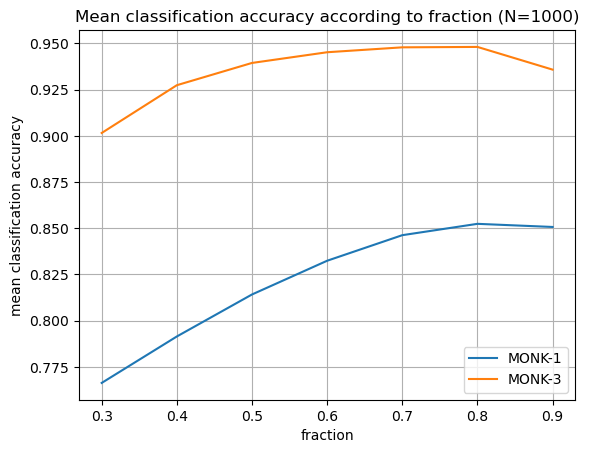

In [25]:
# printing means
plt.plot(fraction, means[:len(fraction)], label="MONK-1")
plt.plot(fraction, means[len(fraction):], label="MONK-3") 

plt.xlabel("fraction")
plt.ylabel("mean classification accuracy")
plt.title("Mean classification accuracy according to fraction (N={})".format(N))

plt.legend()
plt.grid()
plt.show()

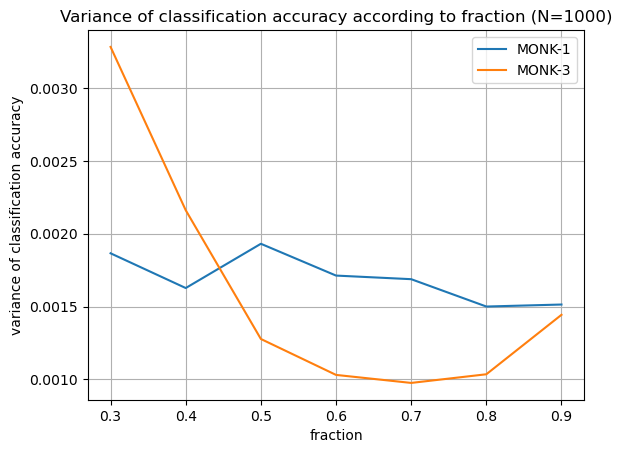

In [27]:
# Printing variances
plt.plot(fraction, variances[:len(fraction)], label="MONK-1")
plt.plot(fraction, variances[len(fraction):], label="MONK-3") 

plt.xlabel("fraction")
plt.ylabel("variance of classification accuracy")
plt.title("Variance of classification accuracy according to fraction (N={})".format(N))

plt.legend()
plt.grid()
plt.show()